In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('Churn_Modelling.csv')

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df.shape

(10000, 14)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [6]:
df.Exited.unique()

array([1, 0], dtype=int64)

In [7]:
df.loc[df.Exited == 1].shape

(2037, 14)

In [8]:
import matplotlib.pyplot as plt

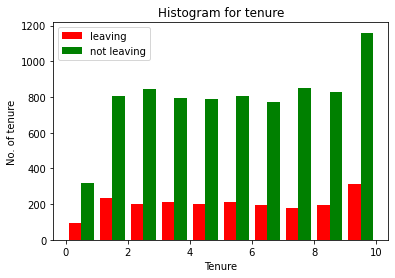

In [9]:
plt.hist([df.loc[df.Exited == 1].Tenure,df.loc[df.Exited == 0].Tenure], color=['red','green'], label=['leaving','not leaving'])
plt.xlabel('Tenure')
plt.ylabel('No. of tenure')
plt.title('Histogram for tenure')
plt.legend()

Text(0.5, 1.0, 'Histogram for Balance')

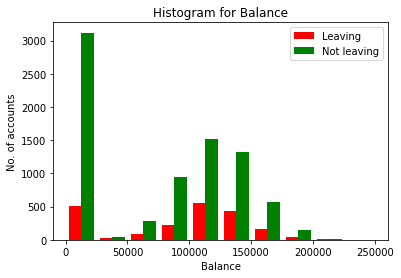

In [10]:
plt.hist([df.loc[df.Exited==1].Balance, df.loc[df.Exited==0].Balance], color=['red','green'], label=['Leaving','Not leaving'])
plt.legend()
plt.xlabel('Balance')
plt.ylabel('No. of accounts')
plt.title('Histogram for Balance')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [12]:
df.Gender.unique()

array(['Female', 'Male'], dtype=object)

In [13]:
df.Gender = df.replace({'Female':0, 'Male':1}).Gender

In [14]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,0,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,0,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,0,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,0,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,0,43,2,125510.82,1,1,1,79084.10,0


In [15]:
df.drop(['RowNumber','CustomerId','Surname'], axis=1, inplace=True)

In [16]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,0,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,0,41,1,83807.86,1,0,1,112542.58,0
2,502,France,0,42,8,159660.80,3,1,0,113931.57,1
3,699,France,0,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,0,43,2,125510.82,1,1,1,79084.10,0


In [17]:
df.Geography.unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [18]:
df2 = pd.get_dummies(df, drop_first=True).copy()

In [19]:
df2.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain
0,619,0,42,2,0.00,1,1,1,101348.88,1,0,0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,0,1
2,502,0,42,8,159660.80,3,1,0,113931.57,1,0,0
3,699,0,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,0,1


In [20]:
df2.shape

(10000, 12)

In [21]:
df.NumOfProducts.unique()

array([1, 3, 2, 4], dtype=int64)

In [22]:
df2.NumOfProducts = df2.NumOfProducts.replace({1:'one',2:'two',3:'three',4:'four'})

In [23]:
df2.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain
0,619,0,42,2,0.00,one,1,1,101348.88,1,0,0
1,608,0,41,1,83807.86,one,0,1,112542.58,0,0,1
2,502,0,42,8,159660.80,three,1,0,113931.57,1,0,0
3,699,0,39,1,0.00,two,0,0,93826.63,0,0,0
4,850,0,43,2,125510.82,one,1,1,79084.10,0,0,1


In [24]:
df3 = pd.get_dummies(df2, drop_first=True).copy()

In [25]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   CreditScore          10000 non-null  int64  
 1   Gender               10000 non-null  int64  
 2   Age                  10000 non-null  int64  
 3   Tenure               10000 non-null  int64  
 4   Balance              10000 non-null  float64
 5   HasCrCard            10000 non-null  int64  
 6   IsActiveMember       10000 non-null  int64  
 7   EstimatedSalary      10000 non-null  float64
 8   Exited               10000 non-null  int64  
 9   Geography_Germany    10000 non-null  uint8  
 10  Geography_Spain      10000 non-null  uint8  
 11  NumOfProducts_one    10000 non-null  uint8  
 12  NumOfProducts_three  10000 non-null  uint8  
 13  NumOfProducts_two    10000 non-null  uint8  
dtypes: float64(2), int64(7), uint8(5)
memory usage: 752.1 KB


In [26]:
df3.head()

,CreditScore,Gender,Age,Tenure,Balance,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,NumOfProducts_one,NumOfProducts_three,NumOfProducts_two
0,619,0,42,2,0.00,1,1,101348.88,1,0,0,1,0,0
1,608,0,41,1,83807.86,0,1,112542.58,0,0,1,1,0,0
2,502,0,42,8,159660.80,1,0,113931.57,1,0,0,0,1,0
3,699,0,39,1,0.00,0,0,93826.63,0,0,0,0,0,1
4,850,0,43,2,125510.82,1,1,79084.10,0,0,1,1,0,0


In [27]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

df3[['CreditScore','Balance','EstimatedSalary']] = scaler.fit_transform(df[['CreditScore','Balance','EstimatedSalary']])

In [28]:
df3.head()

,CreditScore,Gender,Age,Tenure,Balance,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,NumOfProducts_one,NumOfProducts_three,NumOfProducts_two
0,0.538,0,42,2,0.000000,1,1,0.506735,1,0,0,1,0,0
1,0.516,0,41,1,0.334031,0,1,0.562709,0,0,1,1,0,0
2,0.304,0,42,8,0.636357,1,0,0.569654,1,0,0,0,1,0
3,0.698,0,39,1,0.000000,0,0,0.469120,0,0,0,0,0,1
4,1.000,0,43,2,0.500246,1,1,0.395400,0,0,1,1,0,0


In [29]:
scaler_age = MinMaxScaler()

In [30]:
scaler_age.fit_transform([df['Age']])

array([[0., 0., 0., ..., 0., 0., 0.]])

In [31]:
np.max(scaler_age.fit_transform([df['Age']]))

0.0

In [32]:
df3.Age.unique()

array([42, 41, 39, 43, 44, 50, 29, 27, 31, 24, 34, 25, 35, 45, 58, 32, 38,
       46, 36, 33, 40, 51, 61, 49, 37, 19, 66, 56, 26, 21, 55, 75, 22, 30,
       28, 65, 48, 52, 57, 73, 47, 54, 72, 20, 67, 79, 62, 53, 80, 59, 68,
       23, 60, 70, 63, 64, 18, 82, 69, 74, 71, 76, 77, 88, 85, 84, 78, 81,
       92, 83], dtype=int64)

In [33]:
from sklearn.preprocessing import Normalizer
norm = Normalizer()
age = norm.fit_transform([df3.Age])

In [34]:
df3["Age"] = age.reshape(-1,1)

In [35]:
df3.head()

,CreditScore,Gender,Age,Tenure,Balance,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,NumOfProducts_one,NumOfProducts_three,NumOfProducts_two
0,0.538,0,0.010419,2,0.000000,1,1,0.506735,1,0,0,1,0,0
1,0.516,0,0.010171,1,0.334031,0,1,0.562709,0,0,1,1,0,0
2,0.304,0,0.010419,8,0.636357,1,0,0.569654,1,0,0,0,1,0
3,0.698,0,0.009675,1,0.000000,0,0,0.469120,0,0,0,0,0,1
4,1.000,0,0.010667,2,0.500246,1,1,0.395400,0,0,1,1,0,0


In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(df3.drop(["Exited"], axis=1), df3.Exited, test_size=0.2, random_state=4, stratify=df3.Exited)

In [37]:
X_train.shape

(8000, 13)

In [38]:
Y_train.shape

(8000,)

In [39]:
X_train.head()

,CreditScore,Gender,Age,Tenure,Balance,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,NumOfProducts_one,NumOfProducts_three,NumOfProducts_two
556,0.474,1,0.009923,5,0.550988,1,0,0.797109,1,0,0,0,1
7880,0.788,0,0.009427,9,0.000000,0,0,0.104656,0,0,0,0,1
1546,0.702,0,0.011908,1,0.366972,1,1,0.669968,1,0,1,0,0
8261,0.640,1,0.009427,7,0.000000,1,1,0.389301,0,0,0,0,1
7071,0.696,0,0.015629,5,0.000000,1,1,0.867909,0,1,1,0,0


In [40]:
from tensorflow import keras

In [41]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(13,), activation='relu'),
    keras.layers.Dense(7,activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss=keras.losses.binary_crossentropy,
    metrics=['accuracy']
)

In [42]:
model.fit(X_train, Y_train, epochs=100)

Epoch 1/100
250/250 [==============================] - 1s 2ms/step - loss: 0.6817 - accuracy: 0.6217
Epoch 2/100
250/250 [==============================] - 1s 2ms/step - loss: 0.4617 - accuracy: 0.8018
Epoch 3/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4320 - accuracy: 0.8116
Epoch 4/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4200 - accuracy: 0.8180
Epoch 5/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4156 - accuracy: 0.8174
Epoch 6/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4150 - accuracy: 0.8200
Epoch 7/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4140 - accuracy: 0.8184
Epoch 8/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4133 - accuracy: 0.8199
Epoch 9/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4136 - accuracy: 0.8183
Epoch 10/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4128 - accura

250/250 [==============================] - 0s 2ms/step - loss: 0.3808 - accuracy: 0.8363
Epoch 82/100
250/250 [==============================] - 0s 2ms/step - loss: 0.3802 - accuracy: 0.8376
Epoch 83/100
250/250 [==============================] - 0s 2ms/step - loss: 0.3800 - accuracy: 0.8396
Epoch 84/100
250/250 [==============================] - 0s 2ms/step - loss: 0.3798 - accuracy: 0.8378
Epoch 85/100
250/250 [==============================] - 0s 2ms/step - loss: 0.3792 - accuracy: 0.8407
Epoch 86/100
250/250 [==============================] - 0s 2ms/step - loss: 0.3787 - accuracy: 0.8384
Epoch 87/100
250/250 [==============================] - 0s 2ms/step - loss: 0.3793 - accuracy: 0.8395
Epoch 88/100
250/250 [==============================] - 0s 2ms/step - loss: 0.3783 - accuracy: 0.8395
Epoch 89/100
250/250 [==============================] - 0s 2ms/step - loss: 0.3795 - accuracy: 0.8379
Epoch 90/100
250/250 [==============================] - 0s 2ms/step - loss: 0.3781 - accuracy: 

Text(0.5, 1.0, 'Graph b/w epoch and loss')

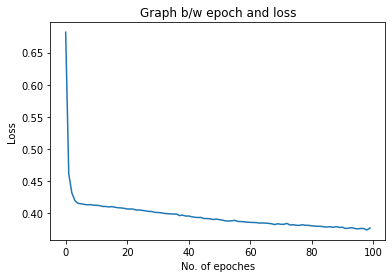

In [43]:
loss = model.history.history['loss']
accuracy = model.history.history['accuracy']

plt.plot(np.arange(len(loss)), loss)
plt.xlabel('No. of epoches')
plt.ylabel('Loss')
plt.title('Graph b/w epoch and loss')

Text(0.5, 1.0, 'Graph b/w accuracy and epoch')

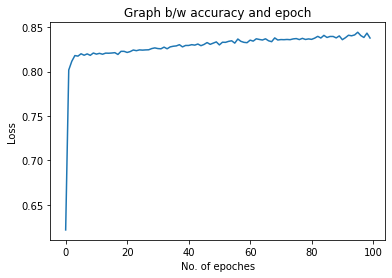

In [44]:
plt.plot(np.arange(len(accuracy)), accuracy)
plt.xlabel('No. of epoches')
plt.ylabel('Loss')
plt.title('Graph b/w accuracy and epoch')

In [45]:
prediction = model.predict(X_test)
prediction = np.round(prediction)
prediction

63/63 [==============================] - 0s 1ms/step


array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]], dtype=float32)

In [46]:
from sklearn.metrics import plot_confusion_matrix, classification_report

print(classification_report(Y_test, prediction))

              precision    recall  f1-score   support

           0       0.84      0.97      0.90      1593
           1       0.66      0.26      0.37       407

    accuracy                           0.82      2000
   macro avg       0.75      0.61      0.64      2000
weighted avg       0.80      0.82      0.79      2000

